# Projektütemezési feladat

## Kritikus utak módszere - Critical Path Method (CPM)

Projektütemezési feladat: egy összetett, több tevékenységből (*részfeladatokból*) álló projektben keressük a választ olyan kérdésekre, mint
* mennyi idő alatt lehetséges véghez vinni a projektet?
* mely **kritikus** tevékenységek alkotják ehhez a szűk keresztmetszetet?
* a nem **kritikus** tevékenységekbe mennyi csúszás fér bele?

És így tovább... Elsőre talán nem egyértelmű, de a legrövidebb út feladattal annyiban rokon, hogy egy ún. *projekt-hálózatban* keressük a **leghosszabb (kritikus) utat**.

Projekt hálózat felépítése:
* irányított hálózat (*activitiy on arc*)
* **élek tevékenységek**
    * élsúly a tevékenységek hossza
* **csúcsok események**
    * beérkező élek tevékenységei befejeződtek
    * kiiunduló élek tevékenségei megkezdődhetnek
    * két kiemelt csúcs: *projekt kezdete* és *vége*
    
Felépítés *szabályai*:
* Projekt kezdete csúcsnál csak kimenő, projekt vége csúcsnál csak bejövő élek
* Minden más csúcsnál bejövő és kimenő élek egyaránt
* Csúcsok számozása: minden él kisebb számú csúcsból nagyobb számúba vezet
* Egy tevékenységet csak egy él reprezentál
* Két csúcs között legfeljebb egy él mehet

1) Feladat: A nagymama vacsorát szeretne készíteni úgy, hogy az összes fogás készen legyen 18:30-ra. Az alábbi táblázat tartalmazza a vacsora elkészítéséhez szükséges tennivalókat, azok hosszát és előfeltételeit.

$$
\begin{array}{l|c|c}
\text{Tevékenység} & \text{Szükséges idő} & \text{Előfeltétel} \\ \hline
\text{A - kézmosás} & 1 & - \\
\text{B - Hús kiolvasztás} & 8 & - \\
\text{C - Hús előkészítés} & 4 & A, B \\
\text{D - Hús sütés} & 11 & C \\
\text{E - Krumpli pucolás} & 10 & - \\
\text{F - Krumpli sütés} & 11 & A, E \\
\text{G - Saláta elkészítés} & 12 & A \\
\text{H - Terítés} & 3 & A \\
\text{I - Tálalás} & 2 & D, F, G, H
\end{array}
$$

a) Melyik az a legkésőbbi időpont, amikor neki kell állnia a vacsora elkészítésének, ha időben kész akar lenni?

## Projekt hálózat, korai és késői időzítések

Megoldás: projekt hálózat szerkesztése, csúcsok ún. **korai** és **késői időzítéseinek** meghatározása

Korai időzítés:
* $ET(i)$ minden $i \in V$ csúcsra a projekt hálózatban
* Legkorábbi időpont, amikor a csúcshoz tartozó esemény bekövetkezhet
* *Projekt vége esemény korai időzítése projekt elvégzésének minimális ideje*

Késői időzítés:
* $LT(i)$ minden $i \in V$ csúcsra a projekt hálózatban
* Legkésőbbi időpont, amikor a csúcshoz tartozó esemény bekövetkezhet anélkül, hogy a projekt legrövidebb időn belüli befejezését késleltetné
* *Projekt kezdete esemény késői időzítése 0*

In [2]:
import networkx as nx

G = nx.DiGraph()
G.add_node(1) # projekt kezdete esemény

{(1, 2): Text(-0.1111127056905794, -0.33333333333333337, '1'),
 (1, 3): Text(-0.5555609827602489, 0.11110568390641773, '8'),
 (1, 4): Text(-0.3333353333873674, -0.11111177779578918, '10')}

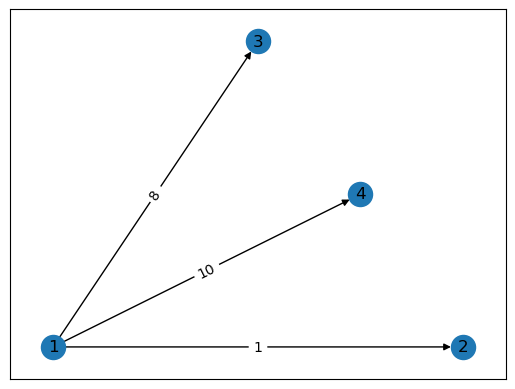

In [3]:
# tevékenységek előzmények nélkül: A, B és E
G.add_node(2)
G.add_edge(1, 2, weight = 1) # A él, 1 hosszal

G.add_node(3)
G.add_edge(1, 3, weight = 8) # B él, 8 hosszal

G.add_node(4)
G.add_edge(1, 4, weight = 10) # E él, 10 hosszal

pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


* Tevékenységek, melyek előzményei már szerepelnek: C, F, G és H
* C előfeltétele A és B
* 2-es csúcs: A befejeződött
* 3-as csúcs: B befejeződött
* B sehol nem előfeltétel, ahol A sem az
* **Fiktív tevékenység**: 0 hosszú él
    * $(2,3)$ él hozzáadása átfogalmazza a 3-as eseményt
    * 3-as csúcs: A és B befejeződött
    * 0 hossz: tényleges tevékenység nem történt

{(1, 2): Text(-0.11764864167814859, -0.3529411764705882, '1'),
 (1, 3): Text(-0.41176094515386086, -0.05882164904751863, '8'),
 (1, 4): Text(-0.4117506474311299, -0.20587883832837067, '10'),
 (2, 3): Text(0.4705849030082496, -0.05882019712589681, '0'),
 (3, 5): Text(0.029411833596361125, 0.38235287228599213, '4')}

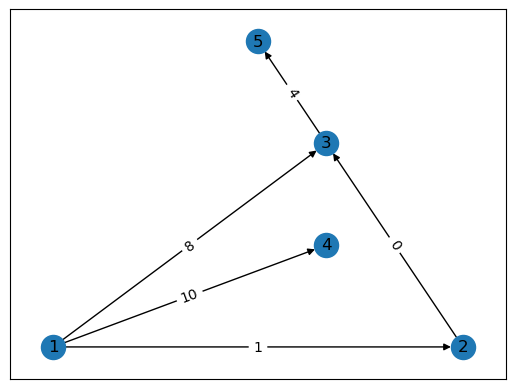

In [6]:
# tevékenységek, melyek előfeltételei már szerepelnek: C, F, G és H

# C tevékenység: előfeltételei A és B
G.add_edge(2, 3, weight = 0) # fiktív él, átfogalmazza a 3-as csúcs jelentését

G.add_node(5)
G.add_edge(3, 5, weight = 4) # C él, 4 hossz, előfeltételek (A, B) 3-ban kész, a C 5-ben kész

pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


*Megjegyzés:*
* fiktív él (0 hosszú) 2-ből 3-ba
* 3 kap egy újabb előzményt

Hasonlóan fiktív éllel átfogalmazzuk 4-et az F számára:

{(1, 2): Text(-0.3793122069468593, -0.13793165518918304, '1'),
 (1, 3): Text(-0.4827609788526075, -0.03448417351846089, '8'),
 (1, 4): Text(-0.17241527771191856, -0.3448275862068966, '10'),
 (2, 3): Text(0.13793495576828718, 0.17240987181791967, '0'),
 (2, 4): Text(0.4482710338518796, -0.13792620626567254, '0'),
 (3, 5): Text(-0.06896159595585094, 0.3793064235420577, '4'),
 (4, 6): Text(0.4482671292819853, -0.24137494395133752, '11')}

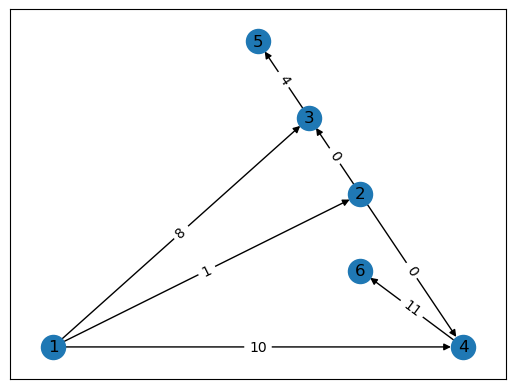

In [10]:
# F tevékenység: előfeltételei A és E
# B-hez hasonlóan E sehol nem előfeltétel A nélkül
G.add_edge(2, 4, weight = 0) # fiktív él, átfogalmazza a 4-es csúcs jelentését
# ET(4) marad 10: 10 > 1 + 0

G.add_node(6)
G.add_edge(4, 6, weight = 11) # F él, 11 hossz, előfeltételek (A, E) 4-ben kész, az F 6-ban kész
# ET(6) = 21

pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


G és H előfeltétele csak A
* indíthatóak 2-ből
* G mehet élből 6-ba (ahova F is megérkezik 4-ből)
    * rögtön átfogalmazza 6-ot, mivel F és G nem előfeltétel egymás nélkül
* *H viszont már nem mehet 6-ba!*
    * szabály: Két csúcs között legfeljebb egy él mehet

{(1, 2): Text(0.1463399320349621, -0.3658536585365853, '1'),
 (1, 3): Text(-0.36585944326503606, -0.2804892510601615, '8'),
 (1, 4): Text(-0.4512233431933721, -0.10975992855922562, '10'),
 (2, 3): Text(0.48781091698854273, -0.28048881136800907, '0'),
 (2, 4): Text(0.4024436206708768, -0.10975806739553234, '0'),
 (2, 6): Text(0.4877975358039979, -0.02438534907258405, '12'),
 (2, 7): Text(0.5731759438093853, 0.06097039765402923, '3'),
 (3, 5): Text(-0.1097534424738913, -0.10975875264805984, '4'),
 (4, 6): Text(-0.1097587526480599, 0.2317046619860864, '11')}

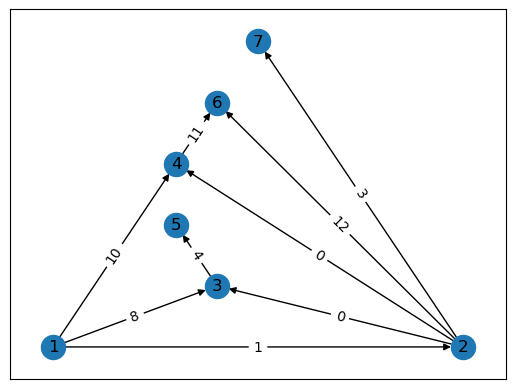

In [13]:
# G és H előfeltétele csak A
G.add_edge(2, 6, weight = 12) # G él, 12 hossz, előfeltétele (A) 2-ben kész, a G 6-ban kész
# (az F mellett - az él átfogalmazza 6-os csúcs jelentését)
# ET(6) marad 21: két előzmény, 10+11 4-en keresztül > 1+12 2-n keresztül

G.add_node(7) # H nem mehet 6-ba, különben két él menne 2 és 6 között
G.add_edge(2, 7, weight = 3) # H él, 3 hossz, előfeltétele (A) 2-ben kész, a H 7-ben kész
# ET(7) = 4: egyetlen előzmény ET(2)=1-gyel, élhossz 3 (H)

pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


Következő tevékenység meglévő előfeltétellel: D

{(1, 2): Text(-0.3898323390325058, -0.1525429830673325, '1'),
 (1, 3): Text(-0.4576236511249161, -0.08474402895228839, '8'),
 (1, 4): Text(-0.1864421374117169, -0.35593220338983045, '10'),
 (2, 3): Text(0.15253908831184138, 0.11864735236612411, '0'),
 (2, 4): Text(0.4237240671764233, -0.15253762649845776, '0'),
 (2, 6): Text(0.288135369008375, -0.08474531428793725, '12'),
 (2, 7): Text(0.2203389830508471, -0.016946597877195435, '3'),
 (3, 5): Text(-0.05084739410776207, 0.3220338347857281, '4'),
 (4, 6): Text(0.49151826536251275, -0.28813201403718885, '11'),
 (5, 8): Text(-0.2542405727051076, 0.3898272239050622, '11')}

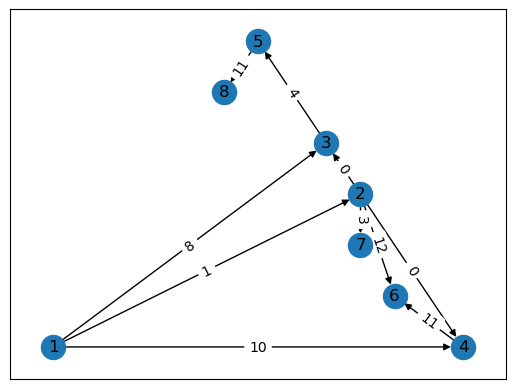

In [16]:
# D (közvetlen) előfeltétele csak C
G.add_node(8)
G.add_edge(5, 8, weight = 11) # D él, 11 hossz, előfeltétele (C) 5-ben kész, a D 8-ban kész
# ET(8) = 23: egyetlen előzmény ET(5)=12-gyel, élhossz 11 (D)

pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


Utolsó tényleges tevékenység I
* előfeltételei D, F, G és H
* D befejeződik 8-ban, F és G 6-ban, H 7-ben
* 1-1 fiktív éllel 6-ot és 7-et beköthetjük 8-ba
* így már 8-ból indulhat I

{(1, 2): Text(0.499996255151927, 2.0, '1'),
 (1, 3): Text(0.9999976211693138, 2.4999988105846565, '8'),
 (1, 4): Text(0.9999976211693138, 1.5000011894153429, '10'),
 (2, 3): Text(1.5000019479775801, 2.5000019479775792, '0'),
 (2, 4): Text(1.5000019479775801, 1.4999980520224199, '0'),
 (2, 6): Text(1.9999976211693138, 1.5000011894153429, '12'),
 (2, 7): Text(1.9999995450489219, 2.0, '3'),
 (3, 5): Text(2.4999962551519275, 2.9999999999999996, '4'),
 (4, 6): Text(2.4999962551519275, 1.0, '11'),
 (5, 8): Text(3.50000194797758, 2.49999805202242, '11'),
 (6, 8): Text(3.50000194797758, 1.50000194797758, '0'),
 (7, 8): Text(3.4999962551519275, 2.0, '0'),
 (8, 9): Text(4.499996255151927, 2.0, '2')}

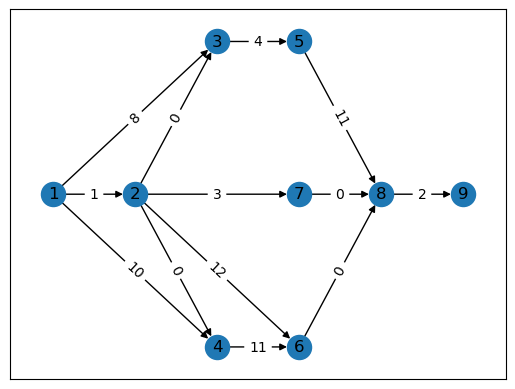

In [19]:
# I előfeltételei D, F, G és H

# fiktív élek:
G.add_edge(6, 8, weight = 0)
G.add_edge(7, 8, weight = 0)
# ET(8) korábban 23, ET(6)=21, ET(7)=4 - marad az ET(8) = 23

G.add_node(9)
G.add_edge(8, 9, weight = 2) # I él, 2 hossz, előfeltétele (D, F, G és H) 8-ban kész, az I 9-ben kész

#pos = nx.planar_layout(G)
pos = {1:(0,2), 2:(1,2), 3:(2,3), 4:(2,1), 5:(3,3), 6:(3,1), 7:(3,2), 8:(4,2), 9:(5,2) }
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)


*Megjegyzés:* egyszerűsítési lehetőség
* D mehetne közvetlenül 5-ből 7-be (ahol H véget ér)
* 6-ból (F és G kész) a fiktív él mehetne 8 helyett 7-be
* így 7-ből indítható lenne I a projekt vége 8-ba
* megspórol egy csúcsot és egy fiktív élet

Korai időzítések kiszámítása
* a csúcsok számozási sorrendjében számítandó
    * szabályok jelentősége
* $ET(1)=0$
* $i > 1$ csúcs közvetlen előzményei: csúcsba mutató élek kezdőpontjai
* közvetlen előzmény $ET$ értéke + az $i$-be vezető él hossza
* ezek közül a *legnagyobb* lesz $ET(i)$

$$
\begin{array}{c|c}
\text{Esemény} & \text{ET} \\ \hline
1 & 0 \\
2 & 1 \\
3 & 8 \\
4 & 10 \\
5 & 12 \\
6 & 21 \\
7 & 4 \\
8 & 23 \\
9 & 25
\end{array}
$$

$ET(5)$ számítása:
* egyetlen bejövő él 3-ből, hossza 4 (C)
* $ET(3) = 8$
* $ET(5) = 8 + 3 = 11$

$ET(6)$: G közvetlen csatlakozása nem befolyásol
* G hossza hiába nagyobb, mint F ($12 > 11$), $10 + 11 > 1 + 12$ miatt ET(6) marad 21

Kései időzítések kiszámítása
* a csúcsok számozási sorrendjében visszafelé számítandó
* $LT(n)=ET(n)$
* $i < n$ csúcs közvetlen követői: csúcsból kimenő élek végpontjai
* közvetlen követő $LT$ értéke - az $i$-ből oda vezető él hossza
* ezek közül a *legkisebb* lesz $LT(i)$

$$
\begin{array}{c|c|c}
\text{Esemény} & \text{ET} & \text{LT} \\ \hline
1 & 0 & 0\\
2 & 1 & 8 \\
3 & 8 & 8\\
4 & 10 & 12 \\
5 & 12 & 12 \\
6 & 21 & 23 \\
7 & 4 & 23 \\
8 & 23 & 23 \\
9 & 25 & 25
\end{array}
$$

1/a) válasz: a vacsora elkészítése 25 percet igényel, legkésőbb 18:05-kor kell elkezdeni

## Kritikus út, tűréshatár, mozgáshatár

1/b) Melyik tevékenységekkel nem csúszhat semennyit, ha időben el akar készülni?

Tevékenységek:
* $(i,j)$ mint él; hossza $t_{ij}$
* **tűréshatára**: amennyivel a tevékenység elkezdése ($i$) a korai időzítésétől ($ET(i)$) eltolódhat anélkül, hogy a projekt legkorábbi befejezése kitolódna
* $TH(i, j) = LT(j) - ET(i) - t_{ij}$
* **kritikus tevékenység, melynek tűréshatára 0**: $TH(i,j) = 0$

A **kritikus út** a kezdés csúcsból a befejezés csúcsba vezető
* csupa *kritikus tevékenységből* álló út
* leghosszabb út

Tevékenység **mozgáshatára**:
* Amennyivel a tevékenység elkezdése ($i$) a korai időzítésétől ($ET(i)$) eltolódhat anélkül, hogy bármelyik utódjának legkorábbi elkezdése késedelmet szenvedne
* $MH(i, j) = ET(j) - ET(i) - t_{ij}$


$$
\begin{array}{c|c|c|c|c}
\text{Tevékenység} & (i,j) \text{ él} & \text{hossz} & TH(i,j) & MH(i,j) \\ \hline
A & (1,2) & 1 & 7 & 0 \\
B & (1,3) & 8 & \color{red}{0} & 0 \\
C & (3,5) & 4 & \color{red}{0} & 0 \\
D & (5,8) & 11 & \color{red}{0} & 0 \\
E & (1,4) & 10 & 2 & 0 \\
F & (4,6) & 11 & 2 & 0 \\
G & (2,6) & 12 & 10 & 8 \\
H & (2,7) & 3 & 19 & 0 \\
I & (8,9) & 2 & \color{red}{0} & 0
\end{array}
$$

1/b) válasz: A kritikus út a B-C-D-I, vagyis a hús kiolvasztása, előkészítése, sütés és tálalás - ezekkel nem csúszhat semennyit (kritikus tevékenységek).

In [23]:
# kritikus út networkx-el, mint leghosszabb út
nx.dag_longest_path(G, weight="weight")

[1, 3, 5, 8, 9]

1/c) Tegyük fel, hogy a nagymamának a legkisebb unokája is „segít”. Ekkor a krumpli megpucolása plusz három percet vesz igénybe. Emiatt korábban kell-e kezdeni a készülődést? Ha igen, mennyivel?

1/c) válasz: Korábban kell kezdeni, mert a krumpli pucolás tűréshatára csak 2 perc. Így 18:04-kor kell nekiállni (változik a kritikus út is!)

1/d) Ha a kisunoka inkább a terítésben segít a krumpli pucolása helyett, és így le tudja rövidíteni egy perccel ennek az idejét, akkor elég-e egy perccel később nekilátni a készülődésnek?

1/d) válasz: Nem, nem elég, mert ez nincs a kritikus úton.

1/e) Határozzuk meg egy LP segítségével az a) és b) kérdésekre a választ! Hogy viszonyul a kapott megoldás a korai és késői időzítésekhez?

## Kritikus út LP modellje

Változók:
* az események (csúcsok) időzítése
* nem-negatív változók
* annyi változó, ahány csúcs

Célfüggvény:
* leggyorsabb befejezés = projekt vége csúcs időzítésének minimalizálása
* pontosabban $\min$(projekt vége csúcs időzítése - projekt kezdete csúcs időzítése)
* de természetesen projekt kezdete csúcs időzítése 0 (minden optimális megoldásban)

Korlátok:
* két szomszédos csúcs közötti idő legalább a köztük menő él (tevékenység) hossza
* beleértve a fiktív tevékenységeket is!
* annyi korlát, ahány tevékenység

In [9]:
from pulp import *

cpm_LP = pulp.LpProblem('főzés', LpMinimize)

x = LpVariable.dicts('x',[u for u in G.nodes()], lowBound = 0, cat="Continuous")
# 1-től indítjuk a változók indexálását, ha a gráfban is 1-től indexáltuk a csúcsokat

# célfüggvény:
cpm_LP += x[9] - x[1]

# élsúlyok kiolvasása a gráfból a korlátokhoz: 
d = nx.get_edge_attributes(G, 'weight')
# éllista:
elek = list(G.edges())

for i in range(len(elek)): # élek számán iterálunk
    # i-dik él kezdőpontja: elek[i][0]
    # i-dik él végpontja: elek[i][1]
    # ekkor az i-dik él súlya: d[elek[i][0], elek[i][1]]
    cpm_LP += x[elek[i][1]] - x[elek[i][0]] >= d[elek[i][0], elek[i][1]], '('+str(elek[i][0])+','+str(elek[i][1])+')'

# ahogy a legrövidebb útnál is, úgy itt is opció
#cpm_LP += x[1] == 0
## csak a szemléletesség kedvéért: nincs is szükség erre a változóra, de akkor külön kéne kezelni az 1-ből induló éleket

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('Leghosszabb út hossza: z* = ', value(cpm_LP.objective))
for v in cpm_LP.variables(): # a változók értékét az optimális megoldásban iteratívan meghatározzuk
    print (v.name, "=", v.varValue)

Optimal
Leghosszabb út hossza: z* =  25.0
x_1 = 0.0
x_2 = 8.0
x_3 = 8.0
x_4 = 12.0
x_5 = 12.0
x_6 = 23.0
x_7 = 23.0
x_8 = 23.0
x_9 = 25.0


1/e) Az itt kapott értékek valahol a korai és késői időzítések között kell, hogy legyenek.

In [10]:
for name, c in cpm_LP.constraints.items():
    print('y' + c.name + ' =', c.pi)

y(1,2) = 0.0
y(1,3) = 1.0
y(1,4) = 0.0
y(2,3) = 0.0
y(2,4) = 0.0
y(2,6) = 0.0
y(2,7) = 0.0
y(3,5) = 1.0
y(4,6) = 0.0
y(5,8) = 1.0
y(6,8) = 0.0
y(7,8) = 0.0
y(8,9) = 1.0


1/f) Határozzuk meg a csúcsok korai és késői időzítéseit LP-k segítségével!

In [11]:
#korai kezdés
cpm_LP += lpSum([x[u] for u in G.nodes()])

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('z* = ', value(cpm_LP.objective))
for v in cpm_LP.variables(): # a változók értékét az optimális megoldásban iteratívan meghatározzuk
    print (v.name, "=", v.varValue)

Optimal
z* =  104.0
x_1 = 0.0
x_2 = 1.0
x_3 = 8.0
x_4 = 10.0
x_5 = 12.0
x_6 = 21.0
x_7 = 4.0
x_8 = 23.0
x_9 = 25.0


C:\Users\balaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [12]:
#kései kezdés
cpm_LP += -lpSum([x[u] for u in G.nodes()])

cpm_LP += x[9] == 25

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('z* = ', -value(cpm_LP.objective))
for v in cpm_LP.variables(): # a változók értékét az optimális megoldásban iteratívan meghatározzuk
    print (v.name, "=", v.varValue)

Optimal
z* =  134.0
x_1 = 0.0
x_2 = 8.0
x_3 = 8.0
x_4 = 12.0
x_5 = 12.0
x_6 = 23.0
x_7 = 23.0
x_8 = 23.0
x_9 = 25.0


1/g) Határozzuk meg a G tevékenység tűrés- és mozgáshatárát LP segítségével!

In [21]:
from pulp import *

cpm_LP = pulp.LpProblem('főzés', LpMinimize)

x = LpVariable.dicts('x',[u for u in G.nodes()], lowBound = 0, cat="Continuous")

cpm_LP += x[9]

d = nx.get_edge_attributes(G, 'weight')
elek = list(G.edges())

for i in range(len(elek)):
    cpm_LP += x[elek[i][1]] - x[elek[i][0]] >= d[elek[i][0], elek[i][1]], '('+str(elek[i][0])+','+str(elek[i][1])+')'

#cpm_LP += x[1] == 0, 'projekt_kezdet'

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('Leghosszabb út hossza: z* = ', value(cpm_LP.objective))
for v in cpm_LP.variables(): # a változók értékét az optimális megoldásban iteratívan meghatározzuk
    print (v.name, "=", v.varValue)

arnyekarak = [0]*len(elek)
i=0
for name, c in cpm_LP.constraints.items():
    print('y' + c.name + ' =', c.pi)
    arnyekarak[i] = c.pi
    i += 1

Optimal
Leghosszabb út hossza: z* =  25.0
x_1 = 0.0
x_2 = 1.0
x_3 = 8.0
x_4 = 10.0
x_5 = 12.0
x_6 = 21.0
x_7 = 23.0
x_8 = 23.0
x_9 = 25.0
y(1,2) = 0.0
y(1,3) = 1.0
y(1,4) = 0.0
y(2,3) = 0.0
y(2,4) = 0.0
y(2,6) = 0.0
y(2,7) = 0.0
y(3,5) = 1.0
y(4,6) = 0.0
y(5,8) = 1.0
y(6,8) = 0.0
y(7,8) = 0.0
y(8,9) = 1.0


In [22]:
cpm_LP += x[6] + x[2]

for i in range(len(elek)):
    if arnyekarak[i] == 1:
        cpm_LP += x[elek[i][1]] - x[elek[i][0]] <= d[elek[i][0], elek[i][1]]

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('G mozgáshatára = ', value(x[6]) - value(x[2]) - d[2, 6])
for v in cpm_LP.variables():
    print (v.name, "=", v.varValue)

Optimal
G mozgáshatára =  8.0
x_1 = 0.0
x_2 = 1.0
x_3 = 8.0
x_4 = 10.0
x_5 = 12.0
x_6 = 21.0
x_7 = 23.0
x_8 = 23.0
x_9 = 25.0


In [23]:
cpm_LP += - x[6] + x[2]

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('G tűréshatára = ', value(x[6]) - value(x[2]) - d[2, 6])
for v in cpm_LP.variables():
    print (v.name, "=", v.varValue)

Optimal
G tűréshatára =  10.0
x_1 = 0.0
x_2 = 1.0
x_3 = 8.0
x_4 = 12.0
x_5 = 12.0
x_6 = 23.0
x_7 = 23.0
x_8 = 23.0
x_9 = 25.0


1/h) Tegyük fel, hogy a kritikus tevékenységek mindegyikén tudunk tetszőleges mértékben (értelemszerűen legfeljebb a tevékenység eredeti hosszáig) rövidíteni. Meddig lehet így leszorítani a projekt befejezéséhez szükséges minimális időt?

In [16]:
from pulp import *

cpm_LP = pulp.LpProblem('főzés', LpMinimize)

d = nx.get_edge_attributes(G, 'weight')
elek = list(G.edges())

x = LpVariable.dicts('x',[u for u in G.nodes()], lowBound = 0, cat="Continuous")
w = LpVariable.dicts('w',range(len(elek)), lowBound = 0, cat="Continuous")

cpm_LP += x[9]

for i in range(len(elek)):
    if arnyekarak[i] == 0:
        cpm_LP += x[elek[i][1]] - x[elek[i][0]] >= d[elek[i][0], elek[i][1]], '('+str(elek[i][0])+','+str(elek[i][1])+')'
    else:
        cpm_LP += x[elek[i][1]] - x[elek[i][0]] + w[i] >= d[elek[i][0], elek[i][1]], '('+str(elek[i][0])+','+str(elek[i][1])+')'
        cpm_LP += w[i] <= d[elek[i][0], elek[i][1]]

#cpm_LP += x[1] == 0, 'projekt_kezdet'

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('Leghosszabb út hossza: z* = ', value(cpm_LP.objective))
for v in cpm_LP.variables(): # a változók értékét az optimális megoldásban iteratívan meghatározzuk
    print (v.name, "=", v.varValue)

Optimal
Leghosszabb út hossza: z* =  21.0
w_1 = 8.0
w_12 = 2.0
w_7 = 4.0
w_9 = 11.0
x_1 = 0.0
x_2 = 1.0
x_3 = 1.0
x_4 = 10.0
x_5 = 1.0
x_6 = 21.0
x_7 = 21.0
x_8 = 21.0
x_9 = 21.0


1/i) Térjünk vissza az alapesetre, és tegyük most fel, hogy a kritikus tevékenységek legfeljebb kétszer annyit rövidülhetnek, mint amennyi az él végpontján lévő csúcs be-fokszáma, és az egységnyi rövidítés (egység)költsége az adott él eredeti hosszának fele. Hogy tudjuk minimális költséggel elérni, hogy az 1/g)-ben elért teljes rövidítés legalább fele megvalósuljon?

In [17]:
cpm_LP += lpSum(w[i]*d[elek[i][0], elek[i][1]]*0.5 for i in range(len(elek)) if arnyekarak[i] == 1)

for i in range(len(elek)):
    if arnyekarak[i] == 1:
        cpm_LP += w[i] <= 2*G.in_degree(elek[i][1])

cpm_LP += x[9] <= 23

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('Leghosszabb út hossza: z* = ', value(cpm_LP.objective))
for v in cpm_LP.variables(): # a változók értékét az optimális megoldásban iteratívan meghatározzuk
    print (v.name, "=", v.varValue)

Optimal
Leghosszabb út hossza: z* =  2.0
w_1 = 0.0
w_12 = 2.0
w_7 = 0.0
w_9 = 0.0
x_1 = 0.0
x_2 = 1.0
x_3 = 8.0
x_4 = 10.0
x_5 = 12.0
x_6 = 21.0
x_7 = 23.0
x_8 = 23.0
x_9 = 23.0


## Gyakorló feladat

2) feladat: Egy projekt végrehajtása több tevékenységből áll. A tevékenységeket, az azokat közvetlenül megelőző tevékenységek listáját, valamint az egyes tevékenységek végrehajtásához szükséges időt az alábbi táblázat tartalmazza.

$$
\begin{array}{l|c|c}
(i, j) \text{tevékenység} & \text{Előfeltétel} & \text{Szükséges idő}  \\ \hline
A & - & 4 \\
B & - & 8 \\
C & B & 3 \\
D & B & 4 \\
E & B & 10 \\
F & A, C & 5 \\
G & D & 7 \\
H & D & 12 \\
I & E, F, G & 9 \\
J & E, F, G & 11 \\
K & H, I & 8
\end{array}
$$

a) Adja meg a korai és késői időzítéseket, valamint a kritikus tevékenységeket!

*Megoldás:*
$$
\begin{array}{c|c|c}
\text{Esemény} & \text{ET} & \text{LT} \\ \hline
1 & 0 & 0\\
2 & 4 & 14 \\
3 & 8 & 8\\
4 & 11 & 14 \\
5 & 12 & 12 \\
6 & 19 & 19 \\
7 & 28 & 28 \\
8 & 36 & 36 \\
\end{array}
$$
Kritikus tevékenységek: B (1,3); D (3,5); G (5,6); I (6,7); K (7,8)

b) Leghamarabb hány napon belül készülhet el a projekt? Adja meg az LP-t, amely segítségével ez kiszámítható!

*Megoldás:*
36 napon belül

$$
\begin{array}{rccc}
\min & x_8 - x_1 & & \\
\text{f.h.} & x_2 - x_1 & \geq & \phantom{1}4 \\
& x_3 - x_1 & \geq & \phantom{1}8 \\
& x_4 - x_2 & \geq & \phantom{1}0 \\
& x_4 - x_3 & \geq & \phantom{1}3 \\
& x_5 - x_3 & \geq & \phantom{1}4 \\
& x_6 - x_3 & \geq & 10 \\
& x_6 - x_5 & \geq & \phantom{1}7 \\
& x_7 - x_5 & \geq & 12 \\
& x_7 - x_6 & \geq & \phantom{1}9 \\
& x_8 - x_6 & \geq & 11 \\
& x_8 - x_7 & \geq & \phantom{1}8 \\
& x_1, \dots, x_8 & \geq & \phantom{1}0
\end{array}
$$

c) Adjuk meg a C tevékenység tűréshatárát az LP modell alapján!

In [18]:
# Megoldás:
from pulp import *

cpm_LP = pulp.LpProblem('feladat', LpMaximize)

x = LpVariable.dicts('x',range(1, 9), lowBound = 0, cat="continuous")
# ezúttal 1-től indítom a változók indexálását, mert a gráfban is 1-től indexáltuk a csúcsokat

# célfüggvény:
cpm_LP += x[4] - x[3]

cpm_LP += x[2] - x[1] >= 4  # A
cpm_LP += x[3] - x[1] == 8  # B - kritikus
cpm_LP += x[4] - x[2] >= 0  # fiktív
cpm_LP += x[4] - x[3] >= 3  # C
cpm_LP += x[5] - x[3] == 4  # D - kritikus
cpm_LP += x[6] - x[3] >= 10 # E
cpm_LP += x[6] - x[4] >= 5  # F
cpm_LP += x[6] - x[5] == 7  # G - kritikus
cpm_LP += x[7] - x[5] >= 12 # H
cpm_LP += x[7] - x[6] == 9  # I - kritikus
cpm_LP += x[8] - x[6] >= 11 # J
cpm_LP += x[8] - x[7] == 8  # K - kritikus

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('A C tűréshatára: z* = ', value(cpm_LP.objective))

Optimal
A C tűréshatára: z* =  6.0


d) Az alábbi táblázat mutatja, hogy mely tevékenységeket legfeljebb milyen mértékben, és milyen egységköltség mellett tudjuk rövidíteni.

$$
\begin{array}{l|c|c}
\text{Tevékenység} & \text{Max. rövidítés} & \text{Egységköltség}  \\ \hline
A & 2 & 11 \\
B & 4 & 7 \\
C & 1 & 5 \\
D & 2 & 6 \\
E & 7 & 3 \\
F & 3 & 5 \\
G & 1 & 6 \\
H & 5 & 4 \\
I & 4 & 9 \\
J & 4 & 12 \\
K & 2 & 8
\end{array}
$$
Adjuk meg a szükséges rövidítéseket, hogy minimális költséggel fejezzük be a projektet legfeljebb 30 nap alatt!

In [19]:
# Megoldás:
from pulp import *

cpm_LP = pulp.LpProblem('feladat', LpMinimize)

x = LpVariable.dicts('x',range(1, 9), lowBound = 0, cat="continuous")
y = LpVariable.dicts('y',range(1, 12), lowBound = 0, cat="continuous")

c=[11,7,5,6,3,5,6,4,9,12,8]
ub=[2,4,1,2,7,3,1,5,4,4,2]

# célfüggvény:
cpm_LP += pulp.lpSum([c[i-1]*y[i] for i in range(1,12)])

cpm_LP += x[2] - x[1] + y[1] >= 4  # A
cpm_LP += x[3] - x[1] + y[2] >= 8  # B
cpm_LP += x[4] - x[2] >= 0  # fiktív
cpm_LP += x[4] - x[3] + y[3] >= 3  # C
cpm_LP += x[5] - x[3] + y[4] >= 4  # D
cpm_LP += x[6] - x[3] + y[5] >= 10 # E
cpm_LP += x[6] - x[4] + y[6] >= 5  # F
cpm_LP += x[6] - x[5] + y[7] >= 7  # G
cpm_LP += x[7] - x[5] + y[8] >= 12 # H
cpm_LP += x[7] - x[6] + y[9] >= 9  # I
cpm_LP += x[8] - x[6] + y[10] >= 11 # J
cpm_LP += x[8] - x[7] + y[11] >= 8  # K

cpm_LP += x[8] <= 30
for i in range(1,12):
    cpm_LP += y[i] <= ub[i-1]

megoldas = cpm_LP.solve()

print(LpStatus[megoldas])
print('Minimális össz.költség: z* = ', value(cpm_LP.objective))
print('Rövidítések:')
print('A:',value(y[1]),'B:',value(y[2]),'C:',value(y[3]),'D:',value(y[4]),'E:',value(y[5]),'F:',value(y[6]))
print('G:',value(y[7]),'H:',value(y[8]),'I:',value(y[9]),'J:',value(y[10]),'K:',value(y[11]))

Optimal
Minimális össz.költség: z* =  42.0
Rövidítések:
A: 0.0 B: 4.0 C: 0.0 D: 0.0 E: 0.0 F: 0.0
G: 1.0 H: 0.0 I: 0.0 J: 0.0 K: 1.0
